# Use FMOX JSONs & Evaluate EfficientTAM 

In [1]:
import os
import sys
import json
from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
# Use the magic command to display plots inline
%matplotlib inline

In [3]:
# import download_datasets
import FMOX_all4_json_to_CSV
import access_json_bboxes
import csv_to_graphics
import size_label_count
import efficientam_evaluation

### Check if the dataset is not downloaded; if it is not, proceed to download it.

In [9]:
script_name = 'download_datasets'

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the script in the parent directory
script_path = os.path.abspath(os.path.join(current_dir, '..', f'{script_name}.py'))

# Check if the script exists
if not os.path.isfile(script_path):
    print(f"Script not found: {script_path}")
else:
    # Add the parent directory to the Python path
    parent_dir = os.path.dirname(script_path)
    sys.path.append(parent_dir)
    try:
        import download_datasets
        print("Module imported successfully.")
    except ImportError as e:
        print(f"Error importing module: {e}")


Module imported successfully.


In [15]:
"""Change "FMOv2/FMOv2" to "FMOv2/imgs" because other dataset has "imgs" - to run the code """

current_folder_name = "../Original_Dataset/FMOv2/FMOv2"
new_folder_name = "../Original_Dataset/FMOv2/imgs"

# Check if the new folder already exists
if os.path.exists(new_folder_name):
    print(f"The folder '{new_folder_name}' already exists. Skipping rename.")
else:
    try:
        os.rename(current_folder_name, new_folder_name)
        print(f"Folder renamed from '{current_folder_name}' to '{new_folder_name}'")
    except Exception as e:
        print(f"An error occurred: {e}")


The folder '../Original_Dataset/FMOv2/imgs' already exists. Skipping rename.


### File Paths

In [5]:
data_folder = "../Original_Dataset/"
fmox_json_path = "../FMOX-Jsons/FMOX_All4.json"  # fmox json annotations
fmox_csv_path = "./FMOX_All4_statistics.csv"
efficienttam_json_path = "../EfficientTAM-Jsons/efficienttam_All4.json"
averageTIoU_path = "./EfficientTAM_averageTIoU.csv"

### Access Bounding Boxes from FMOX JSON Annotation

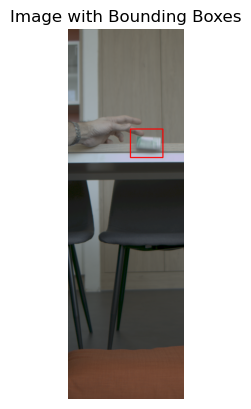

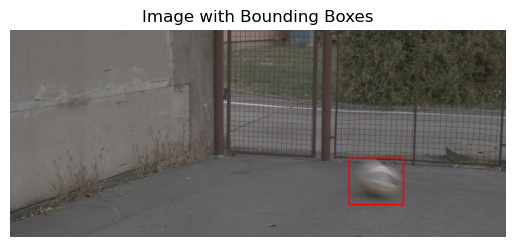

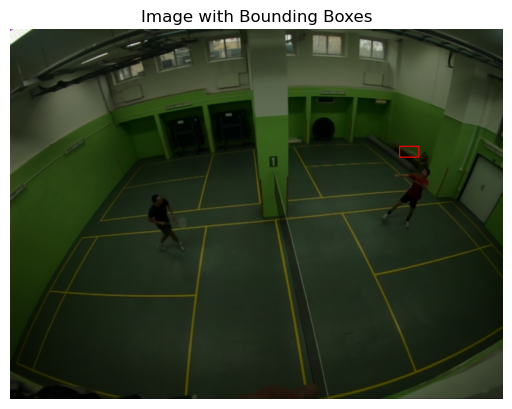

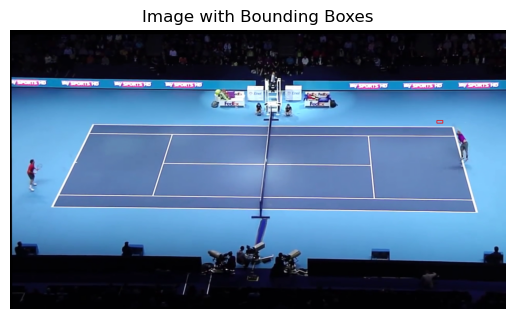

In [13]:
# Display up to 5 images - Too display all images: image_limit=None
access_json_bboxes.access_bboxes(data_folder, fmox_json_path, image_limit=1)  

### Evaluate EfficientTAM JSON results with FMOX JSON

In [7]:
efficientam_evaluation.evaluate_efficienttam(data_folder, fmox_json_path, efficienttam_json_path, averageTIoU_path)

C:\Users\user\PycharmProjects\FMOX\FMOX-code\use-FMOX\calciou.py:72: RuntimeWarning: invalid value encountered in divide
  theta = 2*np.arccos( dists/ (2*rad) )


EfficientTAM trajectory Estimations Saved in:  ./efficientTAM_traj_vis/
EfficientTAM TIOU Saved in:  ./EfficientTAM_averageTIoU.csv


In [34]:
""" Display the EfficientTAM_averageTIoU CSV file"""
import pandas as pd
# Read the CSV file into a DataFrame - path defined in above
df = pd.read_csv(averageTIoU_path) 
# Display the DataFrame - few samples from 3. value to 9.
df[3:10]

,Main Dataset,Subsequence,Sequence Average TIoU
3,Falling_Object,v_marker_GTgamma,0.799
4,Falling_Object,v_pen_GTgamma,0.558
5,Falling_Object,v_rubber_GTgamma,0.614
6,TbD-3D,HighFPS_GT_depth2,0.860
7,TbD-3D,HighFPS_GT_depthb2,0.823
8,TbD-3D,HighFPS_GT_depthf1,0.833
9,TbD-3D,HighFPS_GT_depthf2,0.816


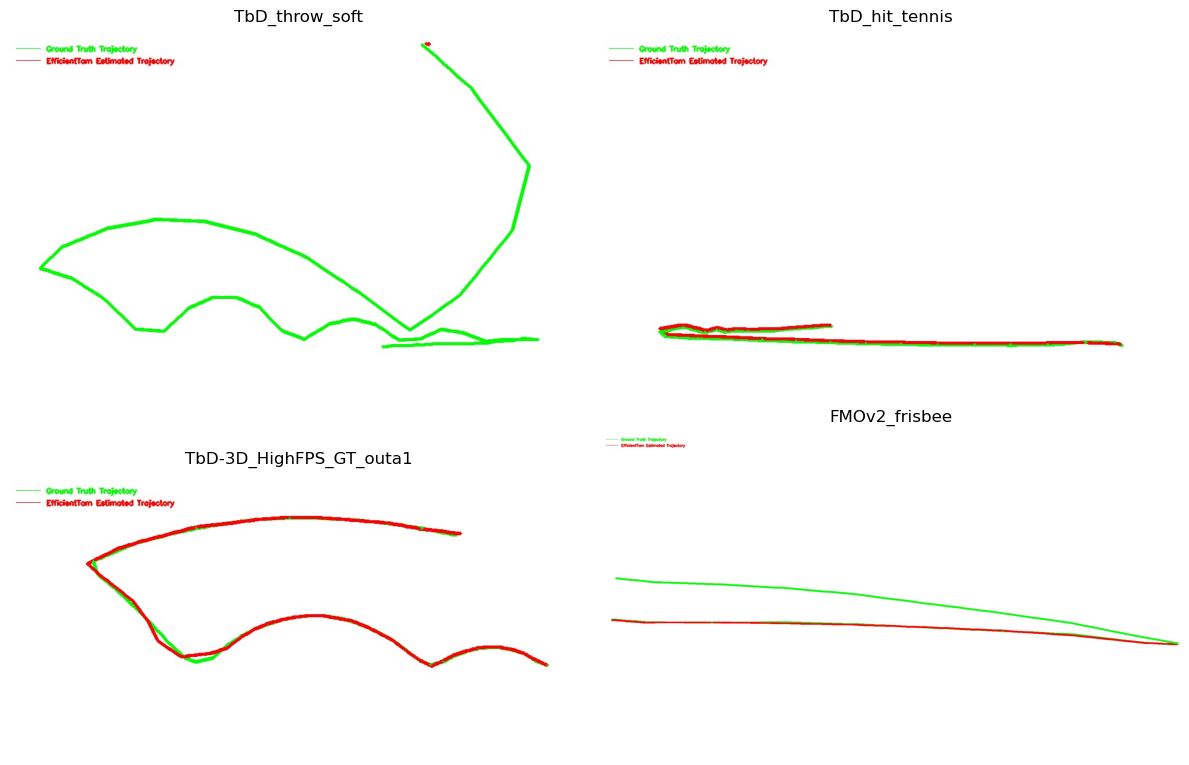

In [24]:
""" Display Saved Trajectories  """
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the directory containing images
efficientTAM_traj_vis_path = "./efficientTAM_traj_vis/"
# List all files in the directory
image_files = os.listdir(efficientTAM_traj_vis_path)
# Filter for image files (you can adjust the extensions as needed)
image_files = [f for f in image_files if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]
# Randomly select 6 images
selected_images = random.sample(image_files, 4) if len(image_files) >= 6 else image_files

plt.figure(figsize=(12, 8))
for i, image_file in enumerate(selected_images):
    img = mpimg.imread(os.path.join(efficientTAM_traj_vis_path, image_file))
    plt.subplot(2, 2, i + 1)  # 3 rows, 2 columns
    # Extract and display the title part from the filename
    # Format: efficientTAM_traj_Falling_Object_v_box_GTgamma.jpg -> Falling_Object_v_box_GTgamma
    title_part = image_file
    if image_file.startswith("efficientTAM_traj_"):
        title_part = image_file[len("efficientTAM_traj_"):]
    title_part = os.path.splitext(title_part)[0]
    
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(title_part)
plt.tight_layout()
plt.show()

### Create CSV from FMOX All4 JSON

In [7]:
""" Create csv file to save information e.g. "Main Dataset", "Subsequence", "Total Frame Number",
"FMO Exists Frame Number", "Average Object Size", "Object Size Levels" for table and graphs.
Get the number of object levels for each sequence e.g. {’extremely_tiny’:1,’large’:2,’medium’: 22,’small’:5,’tiny’:8} 
Note: For tbd whole image sequence need to run releated json"""

FMOX_all4_json_to_CSV.json_to_csv(fmox_json_path, fmox_csv_path)

FMOX_All4_statistics CSV  saved in :  ./FMOX_All4_statistics.csv


In [19]:
""" Display the FMOX_All4_statistics CSV file"""
import pandas as pd
# Read the CSV file into a DataFrame - path defined in above
df = pd.read_csv(fmox_csv_path) 
# Display the DataFrame - few samples from 37. to last value
df[37:-1]

,Main Dataset,Subsequence,Total Frame Number,FMO Exists Frame Number,Object Size Levels
37,FMOv2,ping_pong_top,350,350,"{'extremely_tiny': 1, 'large': 2, 'medium': 24..."
38,FMOv2,softball,96,35,"{'medium': 14, 'small': 13, 'tiny': 1}"
39,FMOv2,squash,250,242,"{'extremely_tiny': 129, 'tiny': 5}"
40,FMOv2,tennis1,116,91,"{'extremely_tiny': 63, 'tiny': 1}"
41,FMOv2,tennis2,278,274,"{'extremely_tiny': 151, 'small': 6, 'tiny': 62}"
42,FMOv2,tennis_serve_back,156,78,"{'extremely_tiny': 31, 'small': 10, 'tiny': 18}"
43,FMOv2,tennis_serve_side,68,35,"{'medium': 1, 'small': 12, 'tiny': 5}"
44,FMOv2,volleyball1,50,33,"{'large': 12, 'medium': 1}"
45,FMOv2,volleyball_passing,66,66,"{'large': 4, 'medium': 62}"


###  CSV to graphics: Bar plot, Scatter plot, Box plot etc.

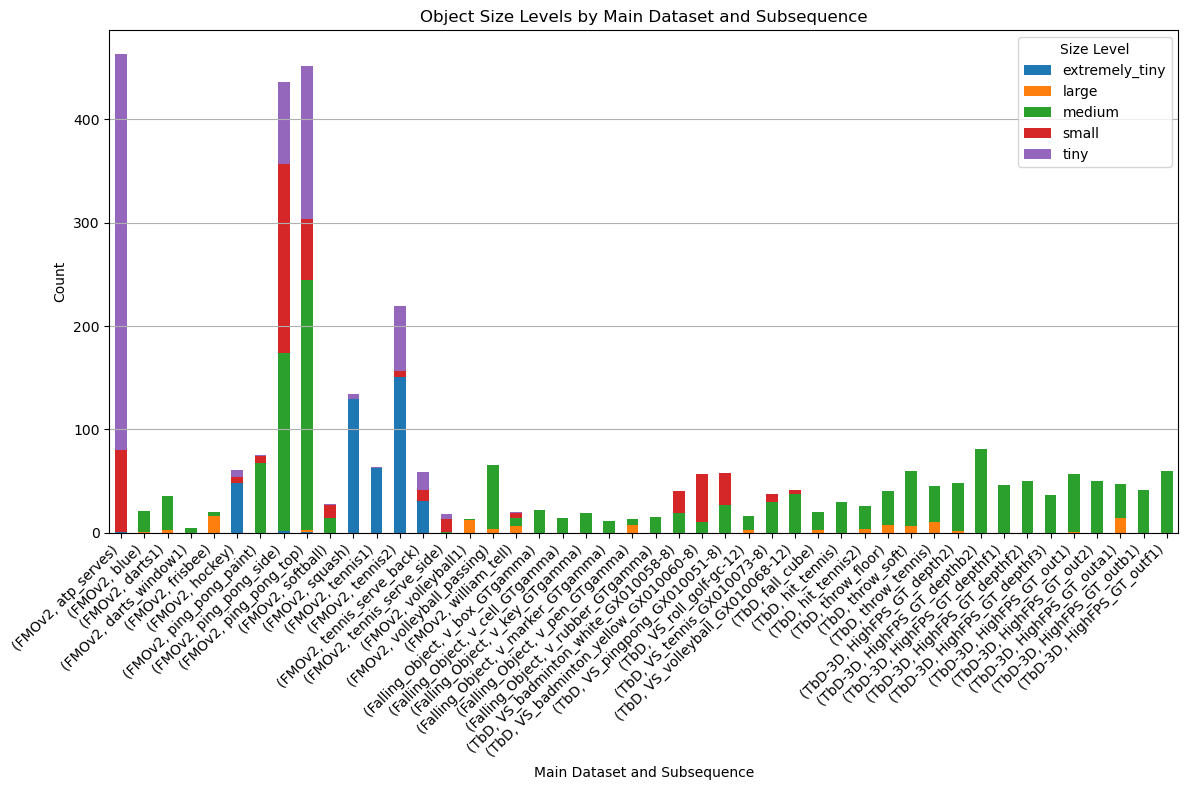

In [11]:
"""Stacked bar chart for visualization object size levels for each dataset and subsequences."""
fmox_csv_data = pd.read_csv(fmox_csv_path)
csv_to_graphics.visualize_object_size_levels(fmox_csv_data)

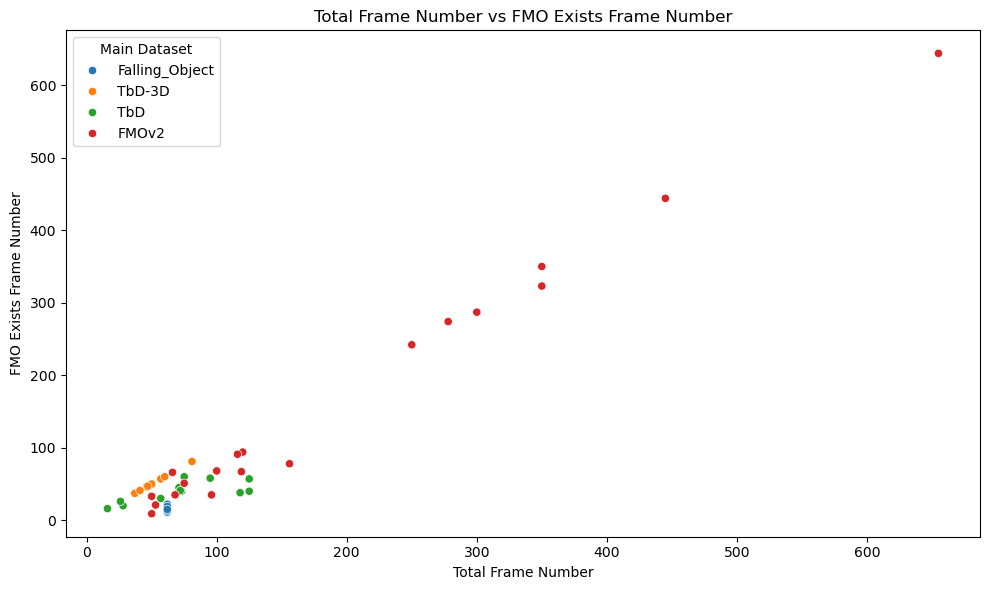

In [9]:
""" Scatter plot for comparing "Number of FMO exist frame" vs. "Number of total frame" """
fmox_csv_data = pd.read_csv(fmox_csv_path)
csv_to_graphics.cvs_viz2(fmox_csv_data)